# Общее описание алгоритма

Для детектирования атомов на снимке был использован алгоритм кластеризации. Суть его заключается в нахождении областей с максимальной интенсивнстью и определении количества данных областей.

В первую очередь, изображение было переведено в оттенки серого путём усреднения по трём каналам (R, G, B). Это необходимо для того, чтобы сохранить только сведения об интенсивности. Далее выполнняется операция взятия порога, где изображение будет преобразовано в массив точек, расположенных на месте исходных пикселей только в тех координатах, где значение интенсивности было выше определённого порога. Порог выбран немногим выше медианной интенсивности всх пикселей, чтобы отсечь основной объём фоновых точек, располагающихся вне атомов (пиков интенсивности).

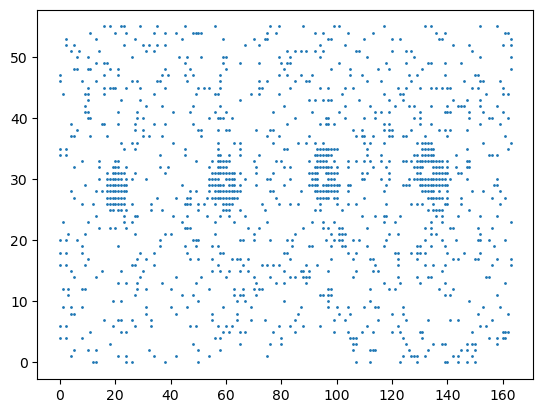

<center> Рис. 1. Изображение после предварительной обработки данных (усреднения по трём каналам и взятия порога). Хорошо видны 4 плотных кластера точек, соответствующих атомам на снимке </center>

Далее для нахождения позиций атомов был использован алгоритм кластеризации. Каждый из атомов будет являться кластером, при этом количество кластеров (4) задано условиями задачи. Наконец, будут определены координаты центров кластеров, из которых будет вычислено, изображению какого из четырёх атомов данный кластер соответствует.

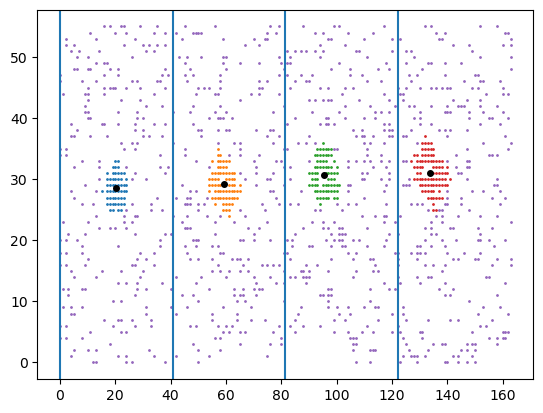

<center>Рис. 2.  Иллюстрация работы алгоритмма, определяющего положения атомов. Различными цветами показаны кластеры, вычисленные алгоритмом кластеризации. Чёрными точками обозначены центры кластеров. Вертикальными синими линиями разделены 4 равные четверти рисунка. По принадлежности центральной точки кластера к четверти определяется присутствие атома в данной позиции.</center>

Для нахождения кластеров были применены соответствующие алгоритмы. В классическом случае, был использован алгоритм DBSCAN [1], определяющий кластеры как области с повышенной плотностью точек. В квантовом случае применялся алгоритм оптимизации на основе модели Изинга [2]. Здесь минимизировалась энергия системы, задаваемой гамильтонианом:

\begin{equation}
H = \sum_{g=1}^G \sum_{i < j}^N d_{ij} x_{i, g} x_{j, g} + \alpha \sum_{i=1}^N \left( \sum_{g=1}^G x_{i, g} - 1 \right)^2
\end{equation}

где $x_{i, g}$ - бинарные переменные, имеющие значение 1 в случае принадлежности $i$-й точки кластеру $g$, $d_{i, j}$ - Евклидово расстояние между точками $i$ и $j$, $G$ - число кластеров в системе, $N$ - общее число точек, а $\alpha$ - варьируемый параметр.

Гамильтониан представляется в виде матрицы $H_{i, j}$, у которой на главных диагоналях будет расположен параметр $\alpha$, а на местах $$

## Список литературы

[1] Ester M. et al. A density-based algorithm for discovering clusters in large spatial databases with noise // Proceedings of the Second International Conference on Knowledge Discovery and Data Mining (KDD-96) / Evangelos Simoudis, Jiawei Han, Usama M. Fayyad. — AAAI Press, 1996. — С. 226–231.
[2] Goto H. et al. High-performance combinatorial optimization based on classical mechanics //Science Advances. – 2021. – Т. 7. – №. 6. – С. eabe7953.